<a href="https://colab.research.google.com/github/AkReposuiii/ML-labs/blob/main/k_nn_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center> 08 </center><h1>

**Objective**: To learn classification task using supervised machine learning algorith based on Nearest Neighbouring method.

<p align:"justify">
**Classification**: Classification is a task that requires the use of machine learning algorithms. It learns how to assign a class label to examples from the problem domain. Examples of classification problems include: (1) classifying if an email is spam or not, (2) classifying a text sentence to be positive or negative, (3) Given recent user behavior, classify as churn or not.

- From a modeling perspective, classification requires a training dataset with many examples of inputs and outputs from which to learn. A model uses the training dataset and calculates how to best map examples of input data to specific class labels. As such, the training dataset must be sufficiently representative of the problem and have many examples of each class label.

- Class labels are often string values, e.g. “spam,” “not spam,” and must be mapped to numeric values before being provided to an algorithm for modeling. This is often referred to as label encoding, where a unique integer is assigned to each class label, e.g. “spam” = 0, “no spam” = 1.

- Classification predictive modeling algorithms are evaluated based on their results. Classification accuracy is a popular metric used to evaluate the performance of a model based on the predicted class labels. Classification accuracy is not perfect but is a good starting point for many classification tasks.

- Popular machine learning algorithms for classification include:
1. Logistic Regression
2. k-Nearest Neighbors
3. Decision Trees
4. Support Vector Machine
5. Naive Bayes

In [1]:
import pandas as pd#data framing of any type of data
import numpy as np#for createing arrays
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

df = pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
df.info()#table feature names will be got

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
df.shape#no of rows and colums

(768, 9)

In [4]:
df.isna().sum()#calculates and displays the sum of missing (NaN) values for each column in the DataFrame df.

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.Pregnancies.sum()
# df.Glucose.sum()
# df.BloodPressure.sum()
# df.SkinThickness.sum()
# df.BMI.sum()
# df.DiabetesPedigreeFunction.sum()
# df.Age.sum()
# df.Outcome.sum()


2953

In [6]:
df.Insulin

0        0
1        0
2        0
3       94
4      168
      ... 
763    180
764      0
765    112
766      0
767      0
Name: Insulin, Length: 768, dtype: int64

In [7]:
df.Glucose

0      148
1       85
2      183
3       89
4      137
      ... 
763    101
764    122
765    121
766    126
767     93
Name: Glucose, Length: 768, dtype: int64

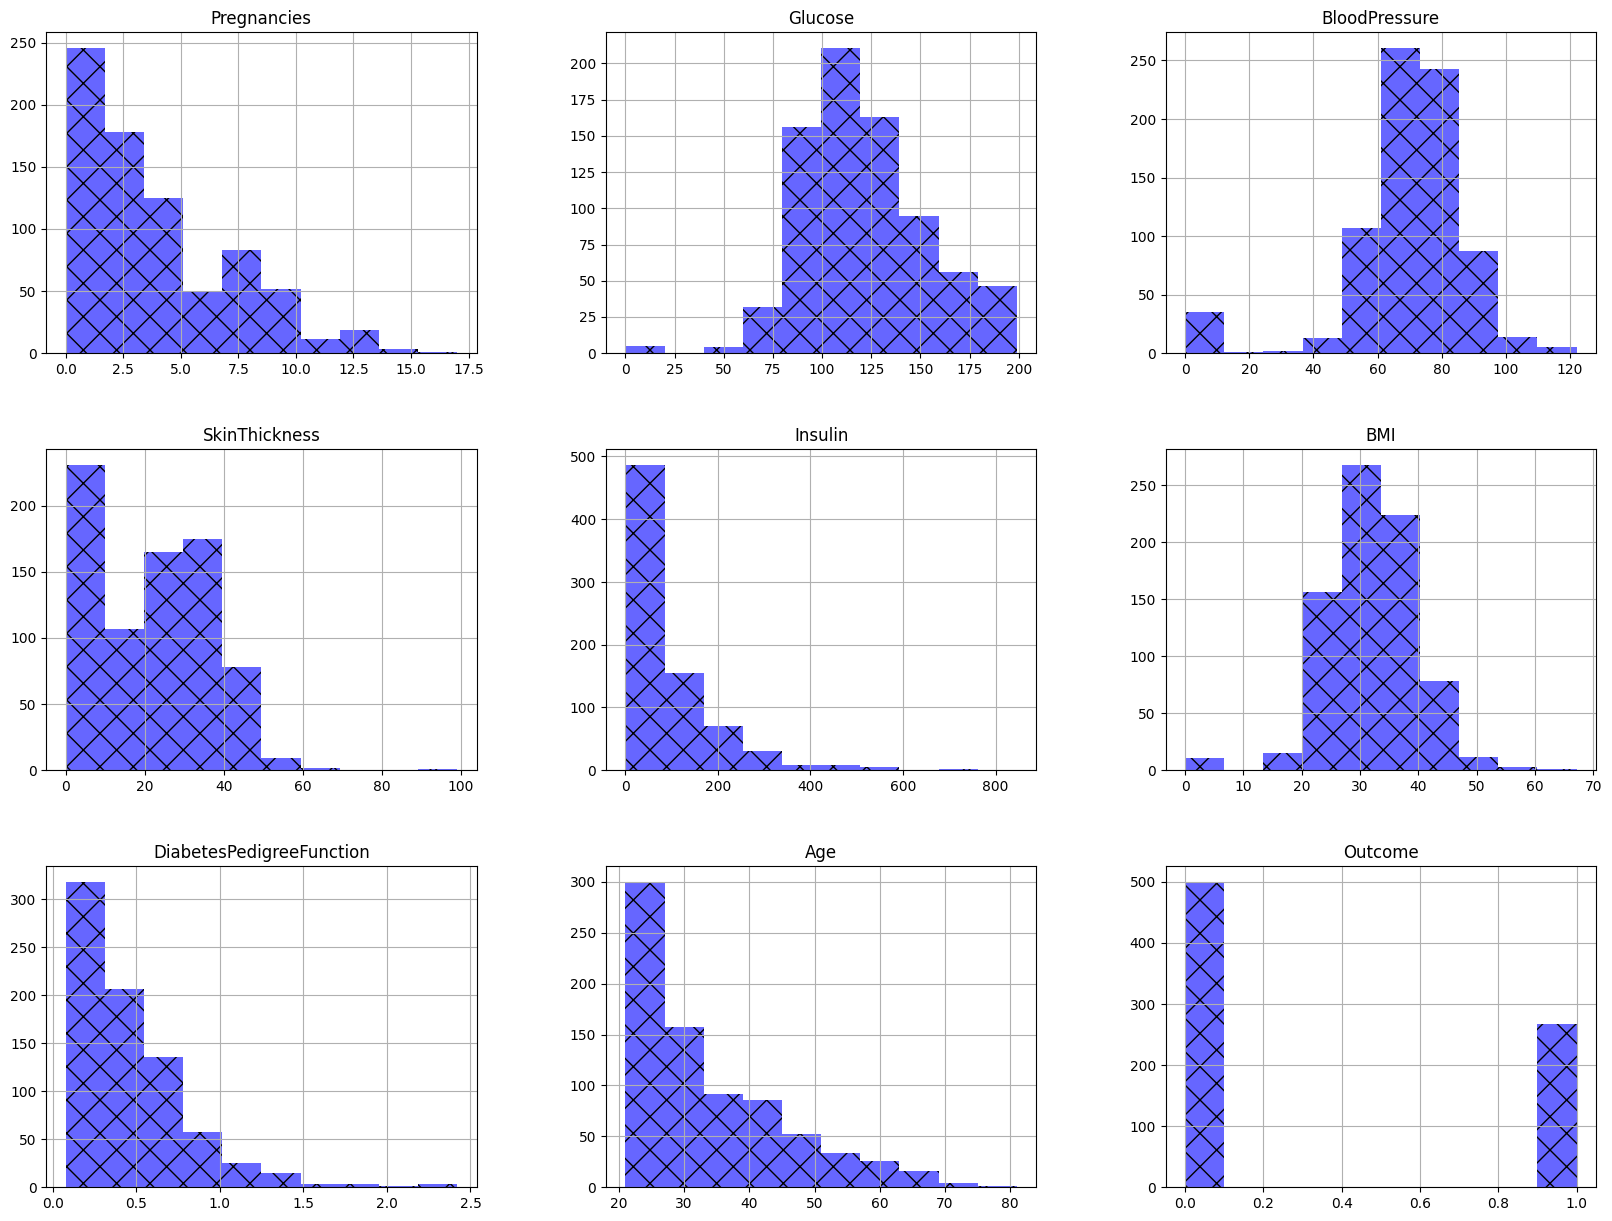

In [8]:
w = 5
df.hist(bins=10, figsize=(20,15), color='blue', alpha=0.6, hatch='X', rwidth=w);

bins=10: Divides the data into 10 bins for each histogram.
figsize=(20,15): Sets the size of the figure to 20 inches wide and 15 inches tall.
color='blue': Sets the color of the bars in the histograms to blue.
alpha=0.6: Sets the transparency of the bars to 60%.
hatch='X': Adds a cross-hatch pattern to the bars.
rwidth=w: Adjusts the width of the bars relative to the bin size (the value of w should be defined elsewhere in your code).
Execute the code yourself to see the histograms. **bold text**

In [9]:
X = df.iloc[:,0:8]
y = df.iloc[:,8]

xtr, xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=4)#xtr-xtrain,ytr-ytrain

In [10]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [11]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

## StandardScaler

In [12]:
sc = StandardScaler()

xtr = sc.fit_transform(xtr)
xte = sc.fit_transform(xte)

In [13]:
clf = KNeighborsClassifier(n_neighbors=11, p=2, metric='euclidean')

In [14]:
clf.fit(xtr,ytr)

pred = clf.predict(xte)

In [15]:
print(confusion_matrix(pred, yte))

[[88 25]
 [14 27]]


In [16]:
print(accuracy_score(pred, yte))

0.7467532467532467


## Tasks
1. Determine the best value or range of values for "k" to obtain optimal result(s) for your dataset. Show the resutls graphically?
2. code for finding the accuracy score without using built in accuracy calculating module.
3. list merits and demerits of KNN Algorithm.